In [ ]:
#%matplotlib

In [2]:
import parse_ats
import numpy as np
from matplotlib import pyplot as plt
import colors
import sys,os
import h5py

/Users/uec/codes/anaconda/2/5.1.0/base/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
#directories = ["Proj_40_R4", "Proj_40_R6", "Proj_40_R7-1"]
directories = ["Proj_40_R4-2", "Proj_40_R6-2", "Proj_40_R7-2"]


In [3]:
def readATS(dirname):
    # daily data - hard coded cause it is slow to read all those files
    times = np.array(range(0,95*365),'d')
    dat = h5py.File(os.path.join(dirname, "visdump_surface_star_data.h5"),'r')
    keys = dat[dat.keys()[0]].keys()
    keys.sort(lambda a,b:int.__cmp__(int(a),int(b)))
    return [keys, times, dat]
    

In [4]:
def thaw_depth(keys, dat):
    if (len(keys)%365 != 0):
        keys = keys[0:365*(len(keys)/365)]
    td = np.array([dat['surface_star-thaw_depth.cell.0'][k] for k in keys])
    return td.reshape((-1,365))

In [6]:
# load data
data = dict()
for k in directories:
    data[k.split("-")[0]] = readATS(k)

In [17]:
#k = directories[1]
#data[k] = readATS(k)
#tds[k] = thaw_depth(data[k][0], data[k][2])
#alts[k] = tds[k].max(1)

In [7]:
# load alts
tds = dict()
alts = dict()
for k in data.keys():
    tds[k] = thaw_depth(data[k][0], data[k][2])
    alts[k] = tds[k].max(1)

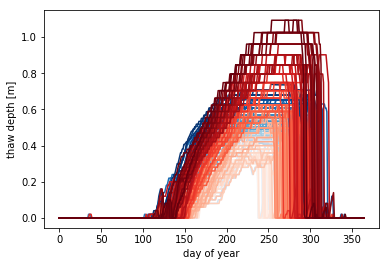

In [8]:
# plot: TD as a function of time
fig = plt.figure()
ax = fig.add_subplot(111)
maps = ['Blues', 'Reds', 'Purples', 'Oranges']

for k, mp in zip(alts.keys(), maps):
    nyears = tds[k].shape[0]
    cm = colors.cm_mapper(0,nyears-1,mp)
    for i in range(tds[k].shape[0]):
        ax.plot(tds[k][i], color=cm(i))
        
plt.xlabel("day of year")
plt.ylabel("thaw depth [m]")
plt.show()

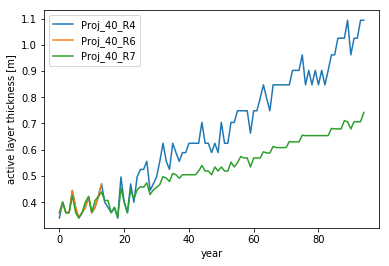

In [19]:
# plot ALT vs year
fig = plt.figure()
ax = fig.add_subplot(111)
for k in alts.keys():
    plt.plot(alts[k], label=k)
plt.legend()

plt.xlabel("year")
plt.ylabel("active layer thickness [m]")
plt.show()

In [11]:
def read_runoff(dirname):
    runoff = np.loadtxt(os.path.join(dirname, "surface_flux-day.dat"))
    if (len(runoff)%365 != 0):
        runoff = runoff[0:365*(len(runoff)/365),:]
    return runoff.reshape((-1,365,2))

runoff = dict()
for k in directories:
    runoff[k.split("-")[0]] = read_runoff(k)


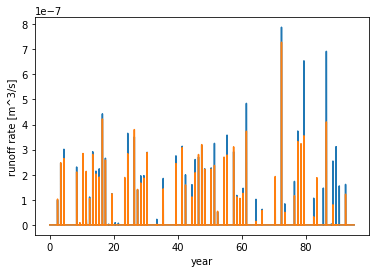

In [12]:
# plot runoff
fig = plt.figure()
ax = fig.add_subplot(111)

for k in runoff.keys():
    ax.plot(runoff[k][:,:,0].ravel()/86400.0/365.0, runoff[k][:,:,1].ravel()/55000.)
    
ax.set_xlabel("year")
ax.set_ylabel("runoff rate [m^3/s]")
plt.show()


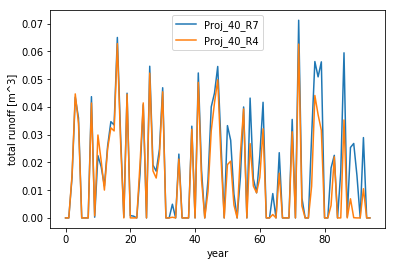

In [13]:
# plot total annual runoff
fig = plt.figure()
ax = fig.add_subplot(111)

for k in runoff.keys():
    ax.plot(runoff[k][:,:,1].sum(1)*86000./55000., label=k)

ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("total runoff [m^3]")
plt.show()

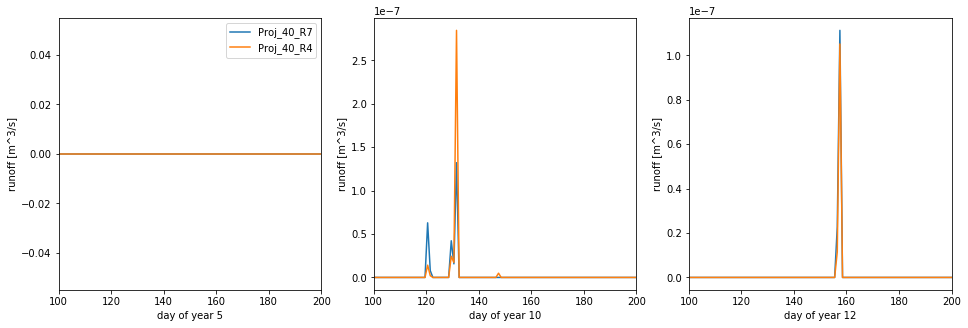

In [14]:
# plot a few years
fig = plt.figure(figsize=(16,5))

def plot(year, ax):
    for k in runoff.keys():
        ax.plot(runoff[k][year,:,0]/86400. - year*365, runoff[k][year,:,1]/55000., label=k)
        
    ax.set_xlabel("day of year %d"%year)
    ax.set_xlim([100,200])
    ax.set_ylabel("runoff [m^3/s]")
ax = fig.add_subplot(131)
plot(5, ax)
ax.legend()
ax = fig.add_subplot(132)
plot(10, ax)
ax = fig.add_subplot(133)
plot(12, ax)

plt.show()


In [ ]:
# plot 
# ALT pore space
# ALT water content
# ALT avg saturation